In [1]:
import sys
sys.path.append('/home/youzhi/python-projects/sp-project/code')

In [2]:
spdir = "/home/youzhi/python-projects/sp-project"

In [3]:
import torch 
import os
import PmPNet as PN
import matplotlib.pyplot as plt

# Device configuration
cuda = torch.cuda.is_available()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
batch_size = 200
num_epochs = 100
learning_rate = 1e-3

# Paths for different folders, data and result folders
datadir= f"{spdir}/Data/combined_readindata"
wdir= f"{spdir}/Train_PN_result_sP"
if not os.path.exists(wdir):
    os.makedirs(wdir)

# Train 

In [5]:
# read in the training data 
train_loader, test_loader = PN.readin_data_train(datadir,"c_readindata",batch_size)

size of data:  405


/home/youzhi/miniconda3/envs/pmpnet/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/youzhi/miniconda3/envs/pmpnet/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:259: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


In [6]:
# train PmPNet
PN.NetTrain(wdir,"train_PN_log","net_PN_model",train_loader,learning_rate,num_epochs,batch_size,device)

Epoch [1/100], Step [1/2] Loss1: 6.764859,Loss2: 3.594633,Loss3: 0.490299
Epoch [2/100], Step [1/2] Loss1: 2.771983,Loss2: 2.726590,Loss3: 0.669603
Epoch [3/100], Step [1/2] Loss1: 1.407440,Loss2: 2.095626,Loss3: 0.684686
Epoch [4/100], Step [1/2] Loss1: 0.985793,Loss2: 2.063502,Loss3: 0.313958
Epoch [5/100], Step [1/2] Loss1: 0.924791,Loss2: 1.743210,Loss3: 0.272752
Epoch [6/100], Step [1/2] Loss1: 0.729331,Loss2: 1.648828,Loss3: 0.276586
Epoch [7/100], Step [1/2] Loss1: 0.624838,Loss2: 1.509978,Loss3: 0.174664
Epoch [8/100], Step [1/2] Loss1: 0.531865,Loss2: 1.365161,Loss3: 0.230988
Epoch [9/100], Step [1/2] Loss1: 0.442781,Loss2: 1.169496,Loss3: 0.155117
Epoch [10/100], Step [1/2] Loss1: 0.426581,Loss2: 1.017212,Loss3: 0.233466
Epoch [11/100], Step [1/2] Loss1: 0.401995,Loss2: 0.745250,Loss3: 0.153967
Epoch [12/100], Step [1/2] Loss1: 0.388203,Loss2: 0.619330,Loss3: 0.162483
Epoch [13/100], Step [1/2] Loss1: 0.368690,Loss2: 0.492241,Loss3: 0.125681
Epoch [14/100], Step [1/2] Loss1: 

In [7]:
# model evaluation on test data
PN.netevalu(wdir,"net_PN_model","prcurve_file","predict_PN_file",test_loader,device);

tensor([-1.8947e+00,  2.9179e+00, -1.0492e+00, -3.2086e+00, -1.4449e+00,
        -1.8938e+00, -2.5066e+00, -7.7520e-01, -3.5317e+00, -7.7121e-01,
        -3.7311e-01,  2.7644e+00,  1.2581e+00, -2.6072e+00, -2.4042e+00,
        -2.3169e+00, -3.2507e-03, -1.0945e+00, -2.4796e+00, -4.1080e+00,
         1.0526e+00,  1.2465e+00, -1.0319e+00, -9.2834e-01, -1.7316e+00,
         4.4765e+00,  1.0658e+00, -7.9398e-01,  2.2200e-01,  2.9138e+00,
        -1.2791e+00,  2.0269e+00, -4.9318e-01, -2.7178e+00, -3.2375e+00,
        -1.1901e+00, -1.0405e+00, -3.7697e+00, -3.0660e+00,  3.0525e+00,
         8.4145e-01, -7.6074e-01, -3.3444e+00,  3.5275e-01, -1.2827e+00,
        -1.8189e+00, -1.7071e+00,  2.2721e+00, -4.0478e+00,  2.6449e-01,
        -2.1885e+00, -3.4085e+00, -2.2294e+00, -4.4450e-02, -4.6796e+00,
        -1.8874e+00, -3.9153e+00, -2.5852e+00,  7.8128e-01, -2.9481e+00,
        -1.9831e+00, -2.8643e+00, -1.5968e+00, -4.4721e-01, -9.5193e-01,
         1.0574e+00,  3.7610e+00,  2.4653e+00, -2.5

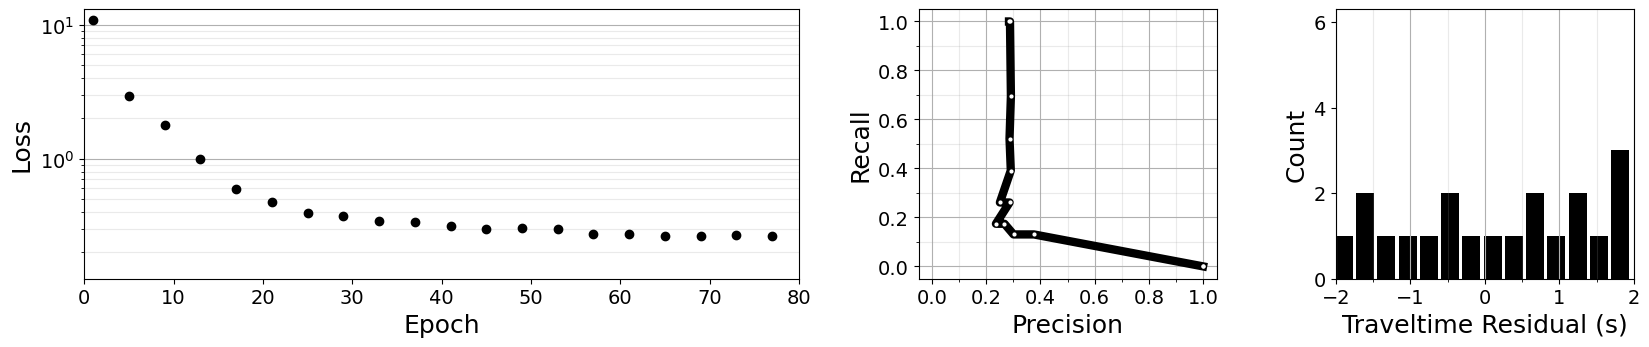

In [8]:
# quickly visualize the result
PN.plot_modeva(wdir,"train_PN_log","prcurve_file","predict_PN_file","plot_PN_modevalu")

## Verify latent variable

tensor([0.0000, 0.1359])


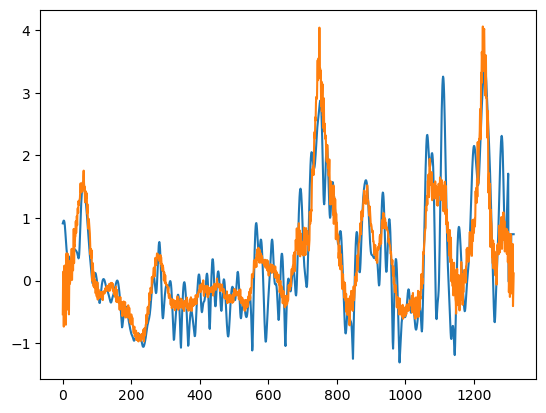

tensor([0.0000, 0.0402])


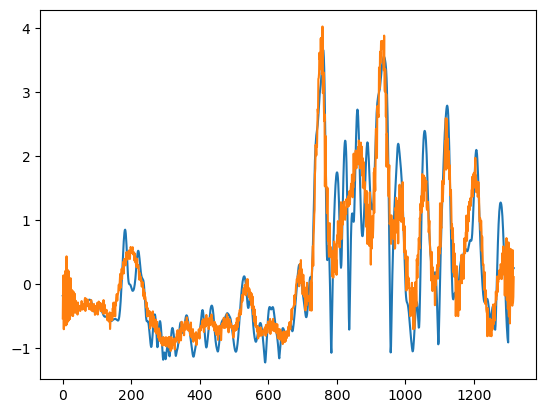

tensor([0.0000, 0.0405])


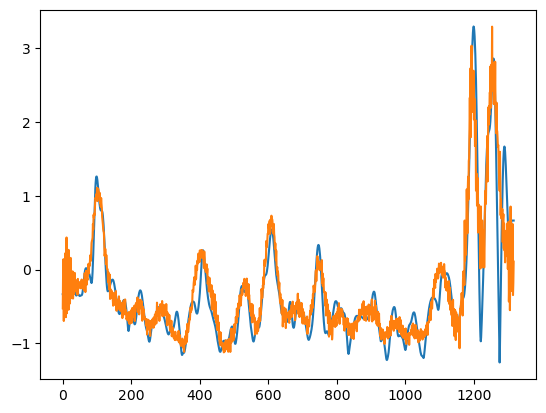

tensor([0.0000, 0.0426])


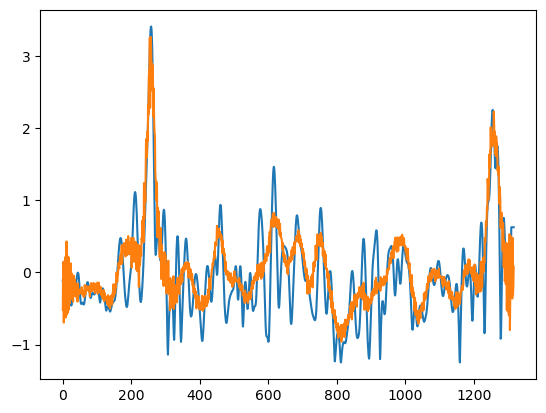

tensor([1.0000, 0.0580])


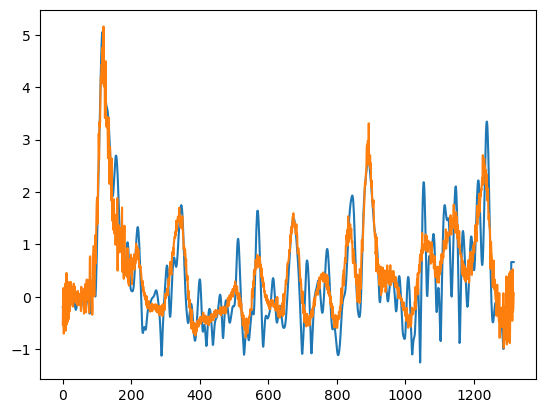

tensor([0.0000, 0.0239])


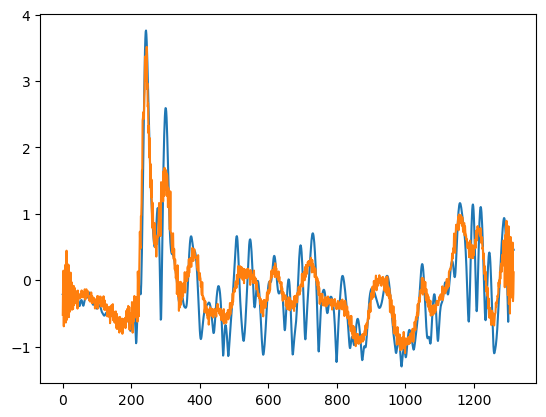

tensor([0.0000, 0.0783])


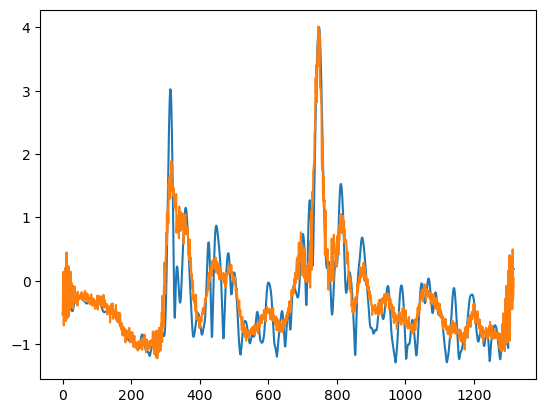

tensor([0.0000, 0.1704])


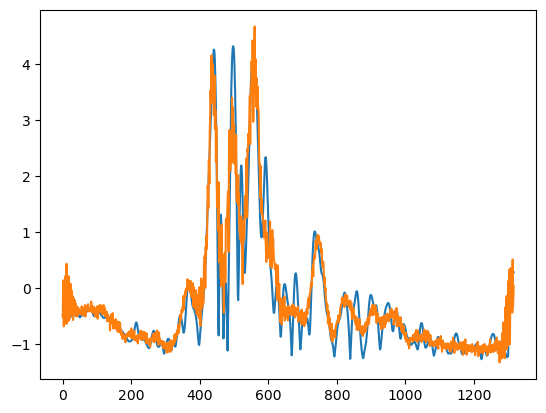

tensor([ 0.0000, -0.1269])


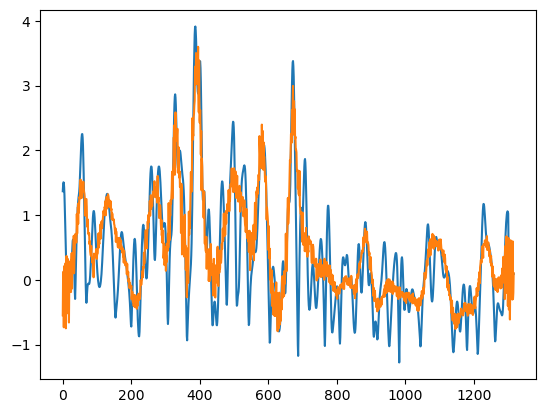

tensor([0.0000, 0.1344])


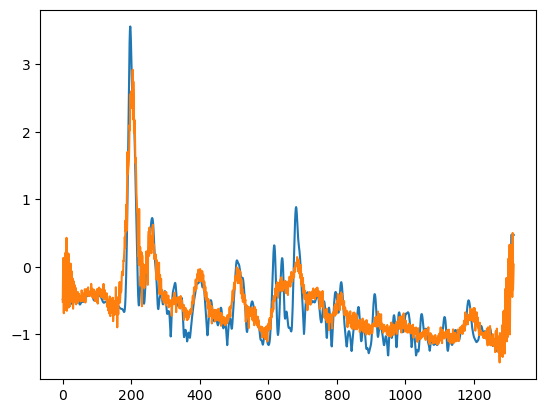

In [9]:
model = PN.ResnetEncoder(PN.BasicBlock, PN.DecodeBlock, [2, 2], 2)
model.load_state_dict(torch.load(f"{wdir}/net_PN_model"))
model.cuda()


for signals, labels in test_loader:
    
    signals = signals.to(device)
    
    labels = labels.to(device)
    
    latents = model.encode(signals)
    
    outputs = model.decode(latents)
    #move outputs back to cpu
    outputs = outputs.detach().cpu()
    signals = signals.detach().cpu()
    labels = labels.detach().cpu()
    #plt.show()
    for i in range(0, 10):
        print(labels[i])
        plt.plot(signals[i][0])
        plt.plot(outputs[i][0])
        plt.show()

# Apply pre-trained PmPNet to identify PmP phase on real data

### Applied to a certain year

In [10]:
# read in the real data 
test_loader = PN.readin_`data_real(datadir,"ValidationData_2015",batch_size)

In [11]:
PN.netpredict(datadir,"ValidationData_2015",wdir,"net_PN_model","predict_PN_file_2015",test_loader,device)

NO.: 0   ID: 37272439   PmP_Prob: 0.323879  PmP_Time: 20.893116  dist: 127.9   evdp: 11.59   mag: 2.1  evtnm: 20151113_1204.CI.DTP
NO.: 1   ID: 37198399   PmP_Prob: 0.000000  PmP_Time: 17.361309  dist: 103.3   evdp: 18.04   mag: 2.3  evtnm: 20150705_1315.CI.SYN
NO.: 2   ID: 37150703   PmP_Prob: 0.000001  PmP_Time: 14.302899  dist: 76.6   evdp: 6.28   mag: 2.4  evtnm: 20150423_1454.CI.TOR
NO.: 3   ID: 37501608   PmP_Prob: 0.000037  PmP_Time: 13.073999  dist: 60.6   evdp: 2.31   mag: 2.2  evtnm: 20151214_0708.CI.DPP
NO.: 4   ID: 37508080   PmP_Prob: 0.000002  PmP_Time: 19.669258  dist: 111.8   evdp: 2.76   mag: 2.3  evtnm: 20151230_1027.CI.JVA
NO.: 5   ID: 37148391   PmP_Prob: 0.000000  PmP_Time: 16.840071  dist: 91.2   evdp: -0.18   mag: 2.3  evtnm: 20150420_0231.CI.HEC
NO.: 6   ID: 37305208   PmP_Prob: 0.000026  PmP_Time: 24.993418  dist: 151.4   evdp: 6.62   mag: 2.5  evtnm: 20150114_1203.CI.SYP
NO.: 7   ID: 37301936   PmP_Prob: 0.000000  PmP_Time: 26.983143  dist: 170.9   evdp: 8.30 

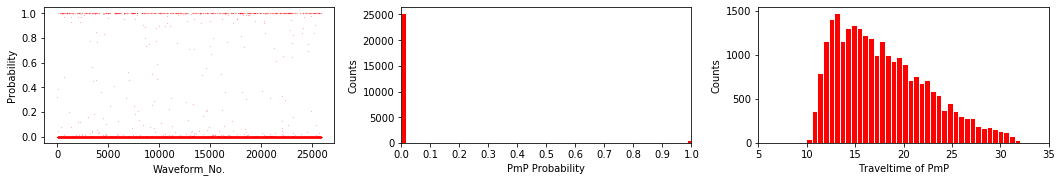

In [2]:
PN.plot_modpredict(wdir,"predict_PN_file_2015","plot_PN_predict2015")